In [208]:
# pandas 라이브러리 호출

import pandas as pd

In [209]:
# 'Young_pop.csv' 파일 불러오기
# df['시도명'], df['청년인구'] 열만 불러오기

df = pd.read_csv('./Young_pop.csv')
df = df[['시도명', '청년인구']]
df

,시도명,청년인구
0,강원,56404
1,경기,579851
2,경남,128482
3,경북,100105
4,광주,66496
5,대구,104823
6,대전,64361
7,부산,146114
8,서울,489384
9,세종,9617


In [210]:
# df에 '위도' 열을 만들고 위도값 넣기

df['위도'] = [37.757687, 37.418163, 35.18083, 36.56889, 35.15972, 35.87222, 
           36.35111, 35.17944, 37.56667, 36.48750, 35.53889, 
           37.45639, 34.80000, 35.95000, 33.50000, 36.60139,
           36.64389]

In [211]:
df

,시도명,청년인구,위도
0,강원,56404,37.757687
1,경기,579851,37.418163
2,경남,128482,35.180830
3,경북,100105,36.568890
4,광주,66496,35.159720
5,대구,104823,35.872220
6,대전,64361,36.351110
7,부산,146114,35.179440
8,서울,489384,37.566670
9,세종,9617,36.487500


In [212]:
# df에 '경도' 열을 만들고 위도값 넣기

df['경도'] = [128.873749, 126.714935, 128.10778, 128.72944, 126.85306, 128.60250, 
           127.38500, 129.07556, 126.97806, 127.28167, 129.31667,
           126.70528, 126.69583, 126.95833, 126.51667, 126.66083,
           127.48944]

In [213]:
df

,시도명,청년인구,위도,경도
0,강원,56404,37.757687,128.873749
1,경기,579851,37.418163,126.714935
2,경남,128482,35.180830,128.107780
3,경북,100105,36.568890,128.729440
4,광주,66496,35.159720,126.853060
5,대구,104823,35.872220,128.602500
6,대전,64361,36.351110,127.385000
7,부산,146114,35.179440,129.075560
8,서울,489384,37.566670,126.978060
9,세종,9617,36.487500,127.281670


#### - 시각화 한글처리, 시스템 OS확인을 위한 라이브러리
#### - 운영체제별 폰트 정의하기

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc
import platform

if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/Malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)

elif platform.system() == 'Darwin': 
    rc('font', family = 'AppleGothic')

else :
    print('Check Your OS System...')


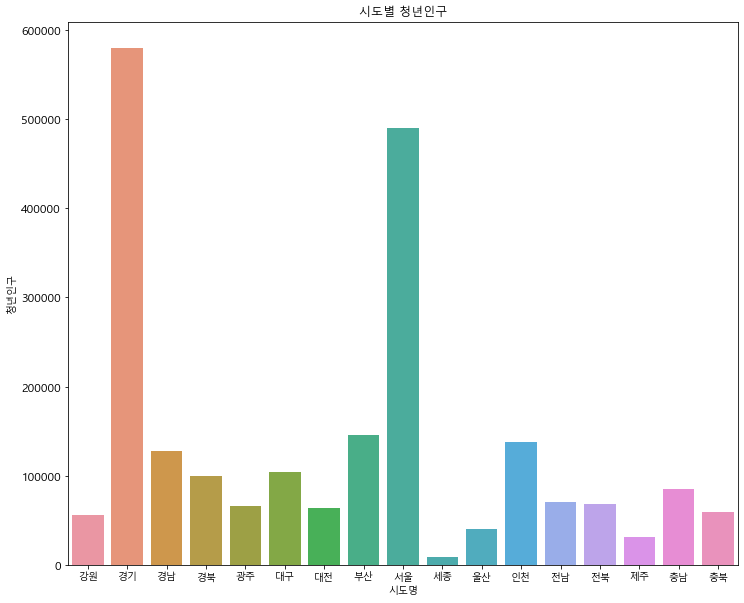

In [215]:
# 시도별 청년인구 막대그래프 그리기

plt.figure(figsize=(12, 10))
sns.barplot(data =df, x = df['시도명'], y = df['청년인구'])
plt.yticks(fontsize=12)
plt.title('시도별 청년인구')
plt.show()

### - folium 라이브러리 호출

In [216]:
import folium

### - 위도, 경도 설정

In [217]:
latitude = 35.17944 # 위도 설정
longitude = 129.07556 # 경도 설정

### - 좌표 찍기 (folium.map)
#### - zoom_start: 확대의 정도

In [218]:
m = folium.Map(location=[latitude, longitude],
               zoom_start=17, 
               width=750, 
               height=500,
#                tiles='cartodbpositron'
              )
m

### - 마커 찍기 (folium.Marker)
#### - popup: 표기할 팝업 문구 지정 (마우스 클릭시 표기되는 문구)
#### - tooltip: 표기할 툴팁 지정 (마우스 오버시 표기되는 문구)
#### - add_to(m): 위에서 설정한 지도에 추가

In [219]:
folium.Marker([latitude, longitude],
              popup="판교역",
              tooltip="판교역 입구").add_to(m)
m

#### - 위도와 경도를 한 리스트로 묶기 위해 values.tolist() 함수 사용

In [220]:
location_data = df[['위도', '경도']].values.tolist()
location_data

[[37.757687, 128.873749],
 [37.418163, 126.714935],
 [35.18083, 128.10778],
 [36.56889, 128.72944],
 [35.15972, 126.85306],
 [35.87222, 128.6025],
 [36.35111, 127.385],
 [35.17944, 129.07556],
 [37.56667, 126.97806],
 [36.4875, 127.28167],
 [35.53889, 129.31667],
 [37.45639, 126.70528],
 [34.8, 126.69583],
 [35.95, 126.95833],
 [33.5, 126.51667],
 [36.60139, 126.66083],
 [36.64389, 127.48944]]

#### - folium.Map(location = 지역의 위도와 경도, zoom_start = 배율, width = 너비, height = 높이)
#### - for문을 사용하여 청년인구 값을 CircleMaker를 활용해 반지름으로 표현하여 map_osm에 add

In [221]:
map_osm = folium.Map(location = location_data[6],
               zoom_start=6.5, 
               width=750, 
               height=700)

for i in range(17):
    
    
    
    pop = df['청년인구'][i]
    
    folium.CircleMarker(location_data[i], 
                        radius = pop / 8000,
                        color = None,
                       fill_color = 'red').add_to(map_osm)

display(map_osm)

#### - Marker를 이용하여 지도위에 마커를 찍고, Heatmap을 이용하여 히트맵 그리기

In [222]:
from folium import plugins

m = folium.Map(location = location_data[6],
               zoom_start=6.5, 
               width=750, 
               height=700,
#                tiles='cartodbpositron'
              )

for i in range(17):
    
    folium.Marker(location = location_data[i],
              popup = (df['시도명'][i], df['청년인구'][i], '명')).add_to(m)
    
    pop = df['청년인구'][i]
    
#     folium.CircleMarker(location_data[i], 
#                         radius = pop / 8000,
#                         color = None,
#                        fill_color = 'red').add_to(m)
    
    plugins.HeatMap(location_data, color = 'red').add_to(m)

m

## 초중고 학교 위치 히트맵

In [223]:
df_school = pd.read_csv('./전국초중등학교위치표준데이터.csv')
df_school_location = df_school.iloc[:, [1, 15, 16]]
df_school_location

,학교명,위도,경도
0,보람초등학교,36.479658,127.293292
1,복흥중학교,35.432795,126.925500
2,개림초등학교,35.156337,129.016172
3,배곧해솔중학교,37.359860,126.717431
4,서울은빛초등학교,37.642662,126.919080
...,...,...,...
11965,거창고등학교,35.692903,127.910693
11966,울릉고등학교,37.492995,130.907353
11967,비아고등학교,35.222742,126.836385
11968,동패초등학교,37.717389,126.740110


In [224]:
location_data = df_school_location[['위도', '경도']].values.tolist()
location_data

[[36.479657502, 127.29329224],
 [35.432795123, 126.92550028],
 [35.15633731, 129.01617163],
 [37.359860422, 126.71743063],
 [37.642661658, 126.91908014],
 [37.685568958, 127.04993268],
 [35.323902506, 129.1729489],
 [35.203476886, 128.70029973],
 [35.11340208, 129.0213157],
 [37.628782658, 127.08899151],
 [37.564885131, 126.9640232],
 [34.576557715, 126.59651649],
 [35.876969754, 128.75330767],
 [38.120334757, 128.2010606],
 [35.229947919, 128.69332378],
 [37.516610977, 126.87264081],
 [37.61061869, 126.90834718],
 [37.08721934, 127.91731819],
 [35.939000046, 128.56082053],
 [34.739976489, 127.64645092],
 [34.252827266, 125.91804685],
 [36.34214728, 126.60123972],
 [36.362591293, 127.33273544],
 [37.308746755, 127.97601128],
 [36.719169216, 126.40117568],
 [35.104532068, 126.49229553],
 [37.5385062, 127.14497294],
 [35.491821802, 129.08738383],
 [35.842963221, 129.20814202],
 [35.145072015, 129.1134257],
 [35.016028592, 128.29735303],
 [37.299681227, 126.85224543],
 [37.62073309, 126.7

In [225]:
from folium import plugins

m = folium.Map(location = location_data[4],
               zoom_start=6.5, 
               width=750, 
               height=700)

plugins.HeatMap(location_data, color = 'red', width = 950, length = 800).add_to(m)
display(m)